In [1]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
from scipy.stats import linregress
from scipy.integrate import simps
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
#Na
ang_right = 68.5 + 9/60 - 60
ang_left = 68.5 + 11/60 - 60
lamda_right = 589 * 10**(-9)
lamda_left = 589.6 * 10**(-9)

def d(lamda, ang, m = 1): 
    diff = np.abs(np.sin(np.deg2rad(ang)) - np.sin(np.deg2rad(60)))
    return (m * lamda)/diff
    
d_right = d(lamda_right, ang_right)
d_left = d(lamda_left, ang_left)
d_avg = np.mean([d_right, d_left])
G = d_avg * 10**9
g = 1/(d_avg * 10**3)
g_right = 1/(d_right * 10**3)
g_left = 1/(d_left * 10**3)
print(g_right, g_left)

print(G, g)
print(d_right, d)

1214.9868670146204 1212.7749849876425
823.8047148160648 1213.8799184018694
8.230541639162973e-07 <function d at 0x7fa12c50f1f0>


In [4]:
#He
llit = [667.82, 587.56, 501.57, 492.19, 447.15]
ang = np.array([78.5 + 12/60, 75.5 + 1/60, 74.5 + 17/60, 68.5 + 15/60, 63 + 13/60]) - 60
sine = np.sin(np.deg2rad([i for i in ang]))
diff = np.abs(sine - np.sin(np.deg2rad(60)))
wavelength = np.array(d_avg * diff) * 10**9

-823.8047148160642 713.4358107881067


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

0.26575793150007415


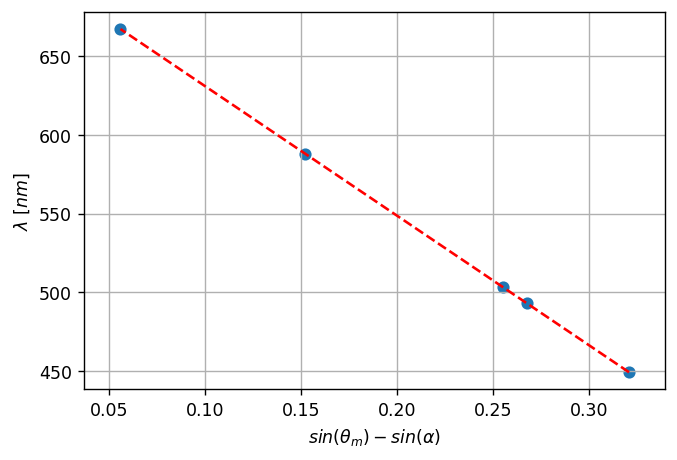

In [6]:
sine = np.sin(np.deg2rad([i for i in ang]))
X = np.array(sine).reshape(-1, 1)
Y = np.array(wavelength).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
intercept = reg.intercept_
coef = reg.coef_
reg_value = reg.score(X, Y)
print(coef[0, 0], intercept[0])
plt.figure(dpi=125)
plt.xlabel(r"$sin(\theta_m) - sin(\alpha)$")
plt.ylabel(r"$\lambda \ [nm]$")
plt.scatter(X, Y)
plt.plot(X, coef[0, 0] * X + intercept[0], 'r--')
plt.grid()
display(Latex("$f(x) = {:.2f}x + {:.2f}$".format(coef[0, 0], intercept[0])))
display(Latex("$R^2 = {:.2f}$".format(reg_value)))
sq = np.sum(np.array([(i**2) for i in X]))
print(sq)
plt.show()

In [11]:
#Hg
ang = np.array([79.5 + 5/60, 75.5 + 4/60, 71.5 + 10/60, 69.5 + 3/60, 69 + 21/60])-60
llit = [435.8, 546.1, 577, 579.1]
sine = np.sin(np.deg2rad([i for i in ang]))
#diff = np.abs(sine - np.sin(np.deg2rad(60)))
wavelength = np.array(d_avg * diff) * 10**9
wavelength_exp = (coef[0, 0] * sine) + intercept[0]
wavelength_exp
#discard second value79

array([437.31498773, 492.3600472 , 546.84802128, 576.75982089,
       579.59641607])

In [6]:
print([i for i in ang])

[19.58333333333333, 15.566666666666663, 11.666666666666671, 9.549999999999997, 9.349999999999994]


In [7]:
#Zn
ang = np.array([77.5 + 15/60, 77 + 1/60, 76 + 18/60, 71.5 + 11/60, 65 + 23/60])-60
# Color: Red, 3 sky blue together, dim green, red
sine = np.sin(np.deg2rad([i for i in ang]))
#diff = np.abs(sine - np.sin(np.deg2rad(60)))
print(len(sine))
wavelength = np.array(d_avg * diff) * 10**9
wavelength_exp = (coef[0, 0] * sine) + intercept[0]
wavelength_exp

5


array([462.28716387, 472.34946799, 482.22125269, 546.61334397,
       636.14751342])

In [8]:
print([i for i in ang])

[17.75, 17.016666666666666, 16.299999999999997, 11.683333333333337, 5.38333333333334]


In [12]:
for i in range(len(sine)):
    siney = ufloat(sine[i], 0.033)
    m = ufloat(coef[0,0], 99)
    c = ufloat(intercept[0], 11.85)
    l = (m * siney) + c
    print("{:2f}".format(l))

437+/-45
492+/-40
547+/-36
577+/-34
580+/-34
